In [77]:
# Import Modules
#Need Run
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import time
import datetime
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX

Feature effective on

inGame
Player active
team

We accept High FN, but not High FP

By random pick some player to review Target trend:

1 inst effect in very short period

2 [log figure] have trend on log figure

3 inst effect in very short period /[log figure] inst effect and with ar lag in a short period

4 [log figure] seem have little tend with inst effect

2X4: 0.6 ~ 0.75 correlation in log form

1,3: should be senstive to some event

Assumption:

1. Let Target 1,3 do as abnormal detect, Target2,4 do as trending

so....how to define abnormal, and it matuaite?

2. Player is A)very famous B)igornable C)between A) and B)

In [ ]:
"""
how about treat it as regression/logistic?
apply data award effective?
playID:676969 target1 no value
"""

In [3]:
#Need Run

Local_path = r'C:\Users\philip_lam\Desktop\Python code\Data\MLB Digitial Engagement'
kaggle_path = "/kaggle/input/mlb-player-digital-engagement-forecasting"
filepath = kaggle_path

os.chdir(filepath)
listx = os.listdir()
#filenames = [x for x in os.listdir() if x.endswith('.csv') and os.path.getsize(x) > 0]
filenames = ['players.csv','example_sample_submission.csv','teams.csv','seasons.csv','example_test.csv','awards.csv',]
#'train.csv',]
    
Label_list = list()
for df_th in filenames:
    print(df_th)
    Label = df_th.split(".")[0]
    Label_list.append(Label)
    globals()[Label] = pd.read_csv(filepath + '/' + str(df_th))

"""
#for load training data from "train.csv"

view_list = ['nextDayPlayerEngagement', 'games', 'rosters', 'transactions', 'standings','awards']#, 'playerTwitterFollowers', 'teamTwitterFollowers']
train_use = train[view_list]
for Table in train_use.columns:
    globals()['train_'+Table] = json_to_dataframe(train,Table)
    print('train_'+Table)

for Table in train_use.columns:
    globals()['train_'+Table].to_csv('/kaggle/working/train_'+Table+'.csv', index=False)

"""
print('----------------train Data---------------')
filepath = '/kaggle/input/mlb-training-csv'   
os.chdir(filepath)
listx = os.listdir()
#filenames = [x for x in os.listdir() if x.endswith('.csv') and os.path.getsize(x) > 0]
filenames = ['train_teamTwitterFollowers.csv', 'train_playerBoxScores.csv','train_rosters.csv', 'train_teamBoxScores.csv', 'train_playerTwitterFollowers.csv', 'train_standings.csv', 'train_nextDayPlayerEngagement.csv', 'train_awards.csv', 'train_games.csv', 'train_transactions.csv']
#, 'train_events.csv'
for df_th in filenames:
    print(df_th)
    Label = df_th.split(".")[0]
    Label_list.append(Label)
    globals()[Label] = pd.read_csv(filepath + '/' + str(df_th))



players.csv
example_sample_submission.csv
teams.csv
seasons.csv
example_test.csv
awards.csv
----------------train Data---------------
train_teamTwitterFollowers.csv
train_playerBoxScores.csv
train_rosters.csv
train_teamBoxScores.csv
train_playerTwitterFollowers.csv
train_standings.csv
train_nextDayPlayerEngagement.csv
train_awards.csv
train_games.csv
train_transactions.csv


In [3]:
def unpack_json(json_str):
    return pd.DataFrame() if pd.isna(json_str) else pd.read_json(json_str)

def json_to_dataframe(data, column):
    data_list = []
    
    for row in range(data.shape[0]):
        
        json_data = data.loc[row, column]
        if str(json_data) != "nan":
            df = pd.read_json(json_data)
            data_list.append(df)
        
    all_data = pd.concat(data_list, axis = 0)
    all_data = all_data.reset_index()
    return all_data
print('----------------Applying Data---------------')
#applying data
view_list = [ 'games', 'rosters', 'transactions', 'standings','awards']#, 'playerTwitterFollowers', 'teamTwitterFollowers','playerBoxScores','teamBoxScores'
test_use = example_test[view_list]
for Table in test_use.columns:
    globals()['test_'+Table] = json_to_dataframe(example_test,Table)
    Label_list.append('test_'+Table)
    print('test_'+Table)


In [15]:
#Check any assumption error on Duplicate
train_playerBoxScores['Date_playId'] = train_playerBoxScores['gameDate'] + "_" + train_playerBoxScores['playerId'].astype(str)
kk = train_playerBoxScores.groupby('Date_playId').count()
kk[kk['index']==2]
train_playerBoxScores[train_playerBoxScores['Date_playId']== '2021-04-29_600869']

,index,home,gamePk,gameDate,gameTimeUTC,teamId,teamName,playerId,playerName,jerseyNum,positionCode,positionName,positionType,battingOrder,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,hitByPitch,atBats,caughtStealing,stolenBases,groundIntoDoublePlay,groundIntoTriplePlay,plateAppearances,totalBases,rbi,leftOnBase,sacBunts,sacFlies,catchersInterference,pickoffs,gamesPlayedPitching,gamesStartedPitching,completeGamesPitching,shutoutsPitching,winsPitching,lossesPitching,flyOutsPitching,airOutsPitching,groundOutsPitching,runsPitching,doublesPitching,triplesPitching,homeRunsPitching,strikeOutsPitching,baseOnBallsPitching,intentionalWalksPitching,hitsPitching,hitByPitchPitching,atBatsPitching,caughtStealingPitching,stolenBasesPitching,inningsPitched,saveOpportunities,earnedRuns,battersFaced,outsPitching,pitchesThrown,balls,strikes,hitBatsmen,balks,wildPitches,pickoffsPitching,rbiPitching,gamesFinishedPitching,inheritedRunners,inheritedRunnersScored,catchersInterferencePitching,sacBuntsPitching,sacFliesPitching,saves,holds,blownSaves,assists,putOuts,errors,chances
Date_playId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01_408234,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
2018-04-01_465041,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
2018-04-01_474568,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
2018-04-01_516782,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
2018-04-01_543281,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29_600869,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
2021-04-29_622682,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2
2021-04-29_641313,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2


In [17]:
train_nextDayPlayerEngagement[['target1','target2','target3','target4','playerId']].groupby('playerId').median()

,target1,target2,target3,target4
playerId,,,,
112526,0.040627,1.712447,0.117506,10.565405
134181,0.073183,1.083241,0.150194,4.698507
279571,0.000000,0.090526,0.000000,0.170867
282332,0.162304,3.388073,0.313201,8.063467
400085,0.077181,2.055594,0.188413,15.306824
...,...,...,...,...
681911,0.000000,0.000000,0.000000,0.000000
683232,0.000000,0.000000,0.000000,0.000000
683734,0.000000,0.043592,0.000000,0.432498


**---------------------------------------------Data on Work------------------------------------------**

In [8]:
#Date time arrange
#Need Run
train_nextDayPlayerEngagement['Date_DT'] = pd.to_datetime(train_nextDayPlayerEngagement['engagementMetricsDate'],format="%Y-%m-%d")
train_nextDayPlayerEngagement['Date_pre_DT'] = train_nextDayPlayerEngagement['Date_DT'] - datetime.timedelta(days=1)
seasons['seasonStartDate_DT'] = pd.to_datetime(seasons['seasonStartDate'],format="%Y-%m-%d")
seasons['seasonEndDate_DT'] = pd.to_datetime(seasons['seasonEndDate'],format="%Y-%m-%d")
train_games['gameDate_DT'] = pd.to_datetime(train_games['gameDate'],format="%Y-%m-%d")
train_rosters['gameDate_DT']= pd.to_datetime(train_rosters['gameDate'],format="%Y-%m-%d")

#Need Run
#[feature] in_season or not
train_nextDayPlayerEngagement['in_season'] = ((train_nextDayPlayerEngagement['Date_pre_DT']>seasons['seasonStartDate_DT'][0])&(train_nextDayPlayerEngagement['Date_pre_DT']<seasons['seasonEndDate_DT'][0]))
for i in seasons.index:
    train_nextDayPlayerEngagement['in_season'] = train_nextDayPlayerEngagement['in_season'] | ((train_nextDayPlayerEngagement['Date_pre_DT']>seasons['seasonStartDate_DT'][i])&(train_nextDayPlayerEngagement['Date_pre_DT']<seasons['seasonEndDate_DT'][i]))

#[feature] in_game preiod
train_nextDayPlayerEngagement['date_hvGame'] = train_nextDayPlayerEngagement['Date_pre_DT'].isin(set(train_games['gameDate_DT']))

#[feature] in_Major game preiod "R","D","F","L","W","C","N","P","A"
#[not resolve] one day possible have 2 type of game, majorly happen in between pre-season and main season
Major_G = list(["R","D","F","L","W","C","N","P","A"])
train_nextDayPlayerEngagement['date_MajorGame'] = train_nextDayPlayerEngagement['Date_pre_DT'].isin(set(train_games[train_games['gameType'].isin(Major_G)]['gameDate_DT']))
train_nextDayPlayerEngagement= pd.merge(train_nextDayPlayerEngagement.drop(['date_Gametype'] ,axis=1,errors = 'ignore'), 
                                         train_rosters[['gameDate_DT','playerId','statusCode','teamId']], 
                                         left_on=['playerId','Date_pre_DT'], right_on=['playerId','gameDate_DT'] ,how = "left")


#[feature] player in_game stutas at preiod
#[feature] Active player in_team at MajorGame
train_nextDayPlayerEngagement = pd.merge(train_nextDayPlayerEngagement.drop(['statusCode','teamId'],axis=1,errors = 'ignore'), 
                                         train_rosters[['gameDate_DT','playerId','statusCode','teamId']], 
                                         left_on=['playerId','Date_pre_DT'], right_on=['playerId','gameDate_DT'] ,how = "left")

train_nextDayPlayerEngagement['statusCode'] = train_nextDayPlayerEngagement['statusCode'].fillna("NA")
train_nextDayPlayerEngagement['teamId'] = train_nextDayPlayerEngagement['teamId'].fillna("NA")

#[feature] Active player in_game at preiod
train_nextDayPlayerEngagement['isActive_player'] = train_nextDayPlayerEngagement['statusCode'] == "A"

#[feature] Active player in_game at MajorGame
train_nextDayPlayerEngagement['isActiveMajorGame_player'] = train_nextDayPlayerEngagement['date_MajorGame'] & train_nextDayPlayerEngagement['isActive_player']


median_set = pd.concat([pd.DataFrame(),train_nextDayPlayerEngagement[['target1','target2','target3','target4']].median()])

#Need Run
#[output review] socure > n
Level_gp = list([1,2,3,4,5,10,20,90,99])
Level_loggp = list([0.1,0.5,1,2,3,3.5,3.9])
for i in range(4):
    train_nextDayPlayerEngagement['target'+str(i+1)+'_10log1000'] = np.log10(train_nextDayPlayerEngagement['target'+str(i+1)] * 1000+1)
    train_nextDayPlayerEngagement['target'+str(i+1)+'_10log100'] = np.log10(train_nextDayPlayerEngagement['target'+str(i+1)] * 100+1)
    train_nextDayPlayerEngagement['target'+str(i+1)+'_10log10'] = np.log10(train_nextDayPlayerEngagement['target'+str(i+1)] * 10+1)
    train_nextDayPlayerEngagement['target'+str(i+1)+'_10log1'] = np.log10(train_nextDayPlayerEngagement['target'+str(i+1)] * 1+1)
    for level_p in Level_gp:
        train_nextDayPlayerEngagement[str(level_p)+'_target'+str(i+1)] = train_nextDayPlayerEngagement['target'+str(i+1)] > level_p
    for level_p in Level_loggp:
        train_nextDayPlayerEngagement[str(level_p)+'_target'+str(i+1)+'_10log100'] = train_nextDayPlayerEngagement['target'+str(i+1)] > level_p

In [ ]:
train_rosters

In [10]:
#['target2_10log100','target4_10log100']
target_var = ['target1','target2_10log1','target3','target4_10log1']
train_nextDayPlayerEngagement[train_nextDayPlayerEngagement['Date_pre_DT'].dt.year == 2019][target_var].corr(method ='pearson')

,target1,target2_10log1,target3,target4_10log1
target1,1.000000,0.342163,0.424340,0.355555
target2_10log1,0.342163,1.000000,0.303348,0.699518
target3,0.424340,0.303348,1.000000,0.327703
target4_10log1,0.355555,0.699518,0.327703,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_ins

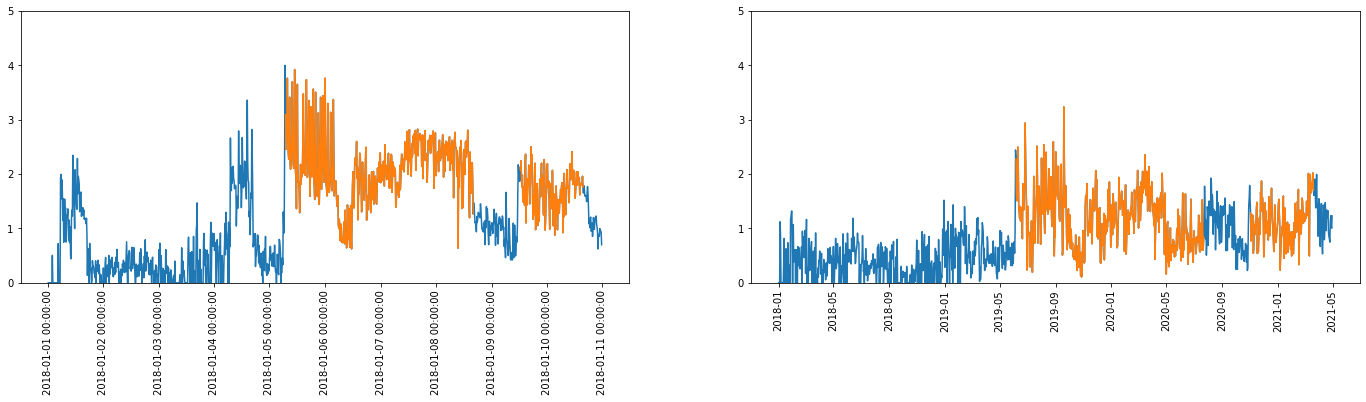

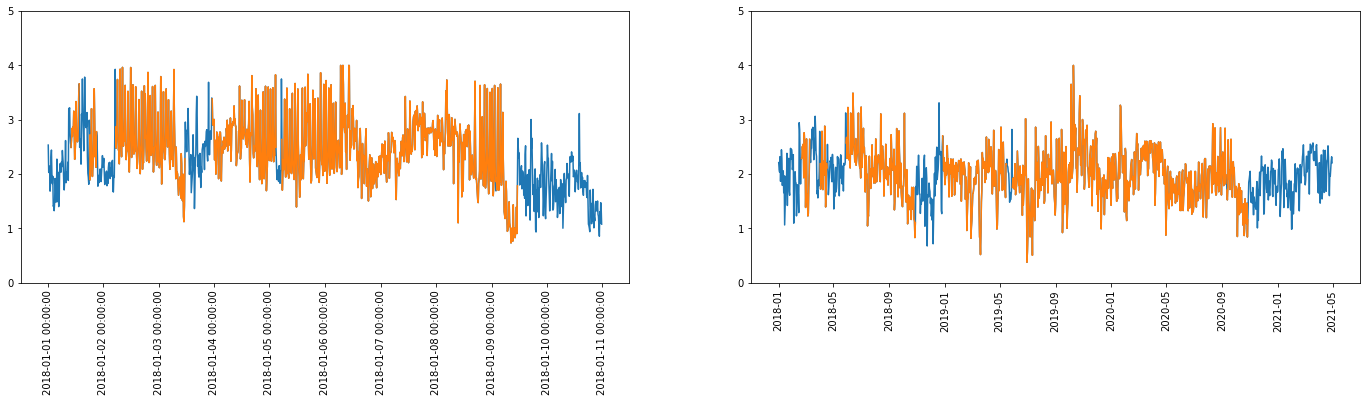

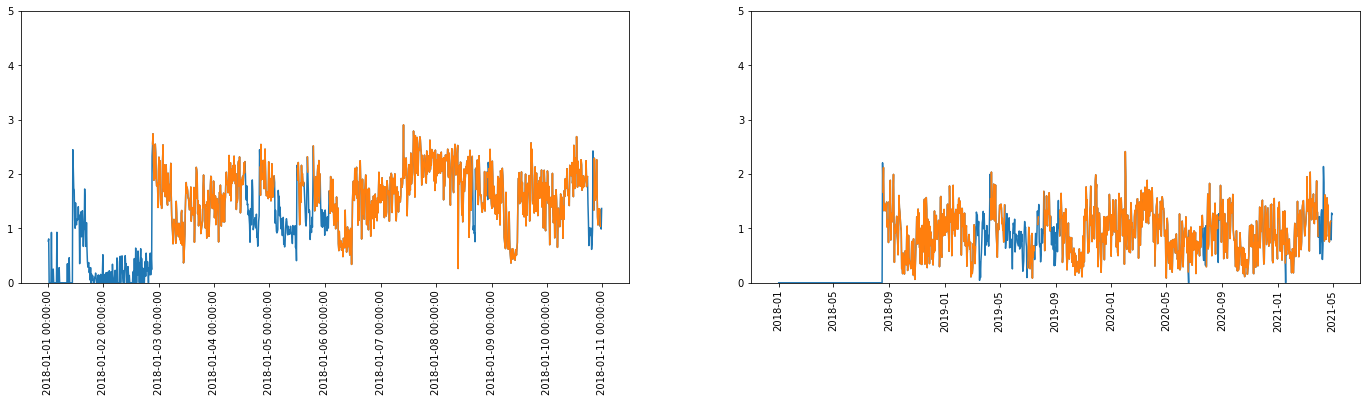

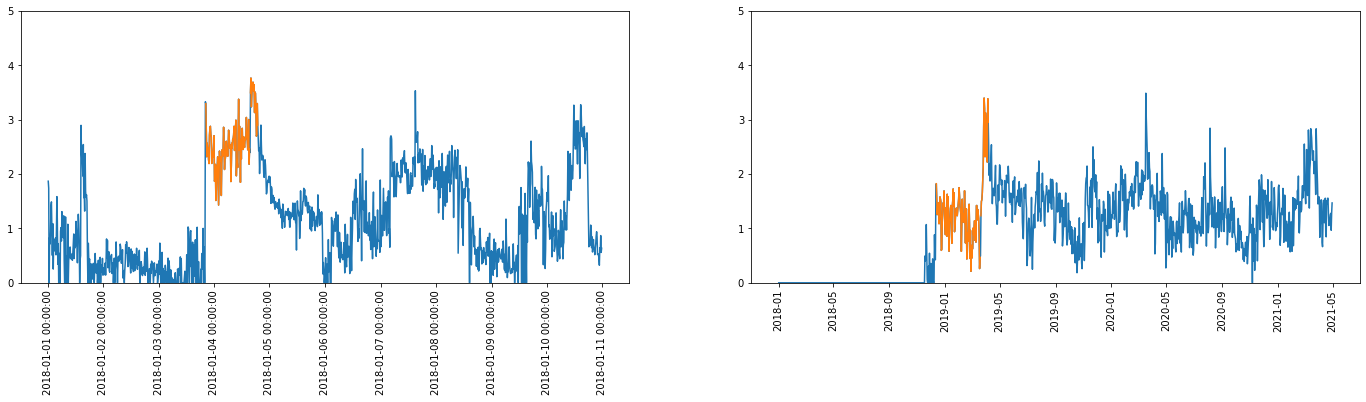

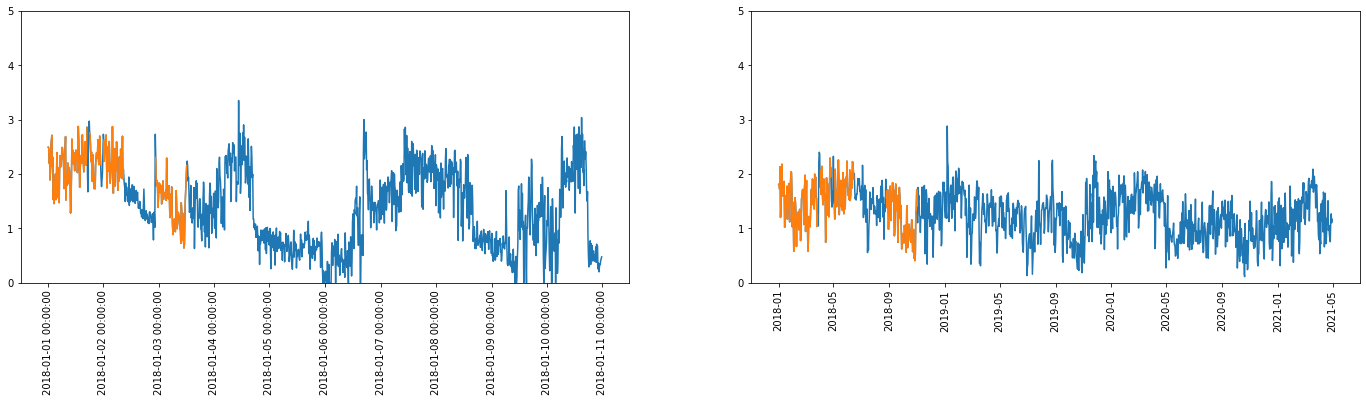

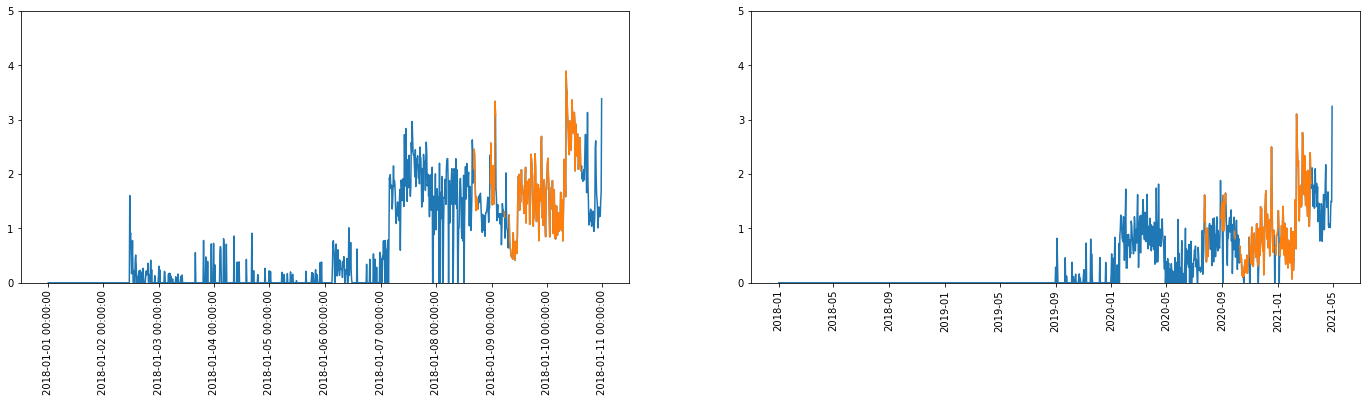

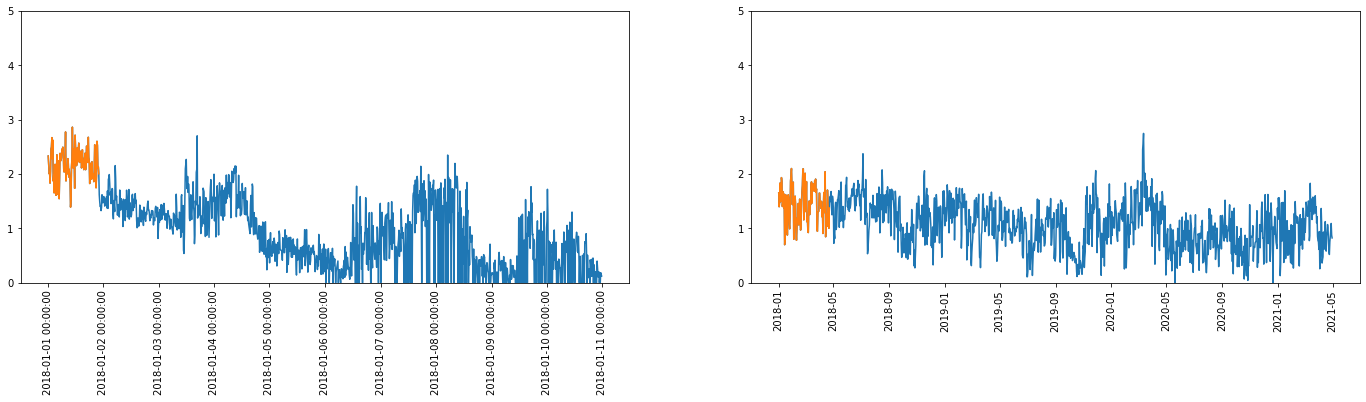

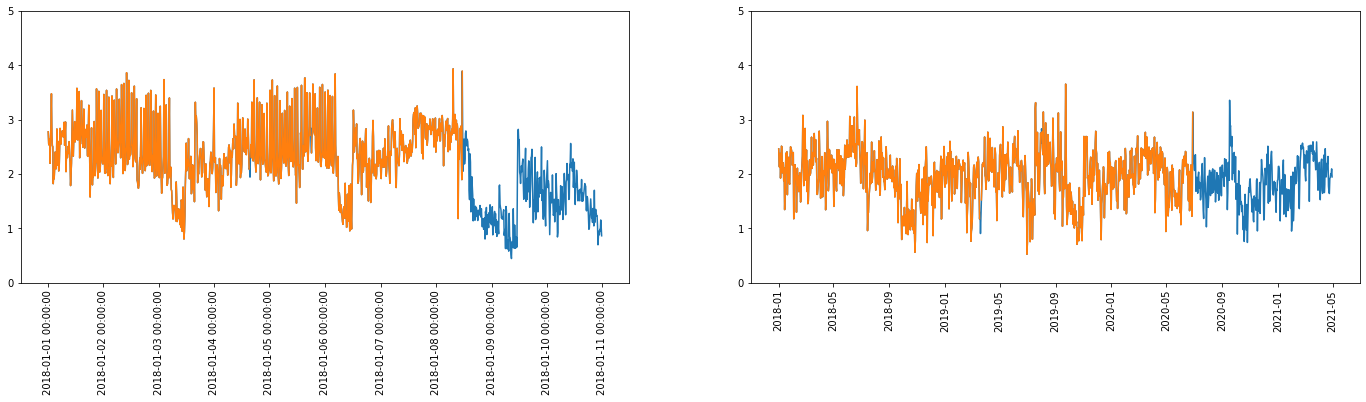

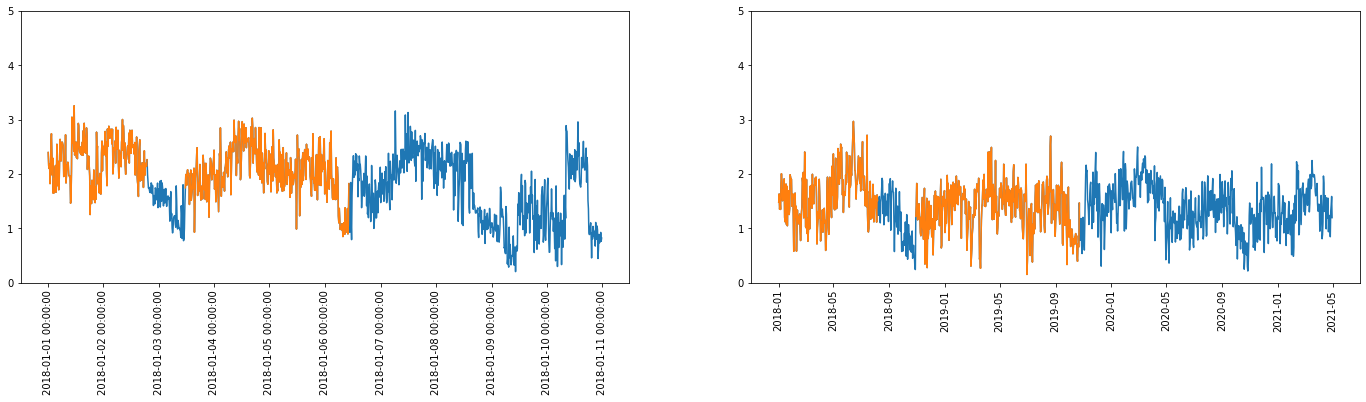

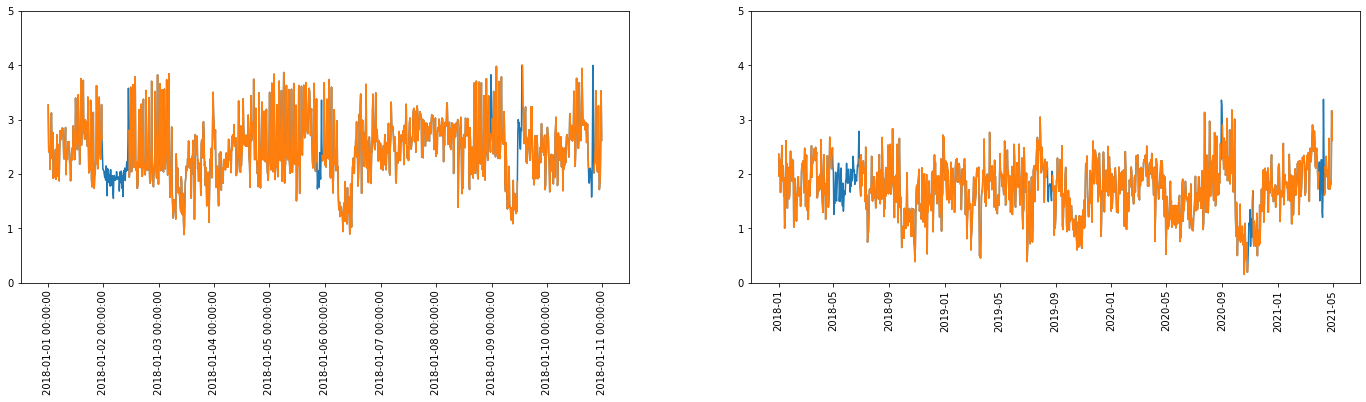

In [100]:
ll = list(set(train_nextDayPlayerEngagement['playerId']))
a4_dims = (24, 5)
#_10log100,['target2_10log100','target2_10log10']
#target_var = list(['target1','target3'])
target_var = list(['target2_10log100','target4_10log100'])
for i in range(10):
    player_df = train_nextDayPlayerEngagement[train_nextDayPlayerEngagement['playerId']==ll[100*i+4]]
    fig, ax = plt.subplots(1,len(target_var),figsize=a4_dims)
    for i in range(len(target_var)):
        kk = player_df[target_var[i]]
        gg = player_df[target_var[i]]*(player_df['isActive_player']) #*(player_df['Date_pre_DT'].dt.year == 2019)
        gg = gg.mask(gg == 0,np.nan)
        ax[i].set(ylim = (0,5))
        ax[i].plot(player_df['Date_pre_DT'],kk)
        ax[i].plot(player_df['Date_pre_DT'],gg)
        ax[0].set_xticklabels(player_df['Date_pre_DT'],rotation=90)
        for tick in ax[i].get_xticklabels():
            tick.set_rotation(90)
    plt.show

In [ ]:
dd = pd.DataFrame()

#'in_season', 'date_hvGame', 'isActive_player', 'date_MajorGame', 'isActiveMajorGame_player'
#'teamId','statusCode'
TF_feature = 'statusCode'

#Logic_list = list([True,"All",False])
Logic_list = set(train_nextDayPlayerEngagement[TF_feature])

for logic in Logic_list:
    if logic == "All":
        df = train_nextDayPlayerEngagement
    else:
        df = train_nextDayPlayerEngagement[train_nextDayPlayerEngagement[TF_feature]==logic]
        
    for level_p in Level_gp:
        column_veiw = [str(level_p)+'_target1',str(level_p)+'_target3']
        dd[level_p] = (df[column_veiw].mean()).reset_index(drop=True)# * df[column_veiw].count()).reset_index(drop=True)
        #dd = pd.merge(dd,train_rosters[['gameDate_DT','playerId','statusCode']], left_on=['playerId','Date_pre_DT'], right_on=['playerId','gameDate_DT'] ,how = "left"))
    
    print(TF_feature,str(logic),df['playerId'].count())
    display(dd)
    if logic == True:
        Ture_fig = pd.concat([pd.DataFrame(),dd])
    elif logic == False:
        False_fig = pd.concat([pd.DataFrame(),dd])
#result_fig = Ture_fig-False_fig
#display(result_fig)

In [93]:
#------------------------------------------------------------Log--------------------------------------------------------------

dd = pd.DataFrame()

#'in_season', 'date_hvGame', 'isActive_player', 'date_MajorGame', 'isActiveMajorGame_player'
#'teamId','statusCode',
TF_feature = 'statusCode'

#Logic_list = list([True,"All",False])
Logic_list = set(train_nextDayPlayerEngagement[TF_feature])

for logic in Logic_list:
    if logic == "All":
        df = train_nextDayPlayerEngagement
    else:
        df = train_nextDayPlayerEngagement[train_nextDayPlayerEngagement[TF_feature]==logic]
        
    for level_p in Level_loggp:
        column_veiw = [str(level_p)+'_target1_10log100',str(level_p)+'_target2_10log100',str(level_p)+'_target3_10log100',str(level_p)+'_target4_10log100']
        #column_veiw = [str(level_p)+'_target1',str(level_p)+'_target3']
        dd[level_p] = (df[column_veiw].mean()).reset_index(drop=True)# * df[column_veiw].count()).reset_index(drop=True)
        #dd = pd.merge(dd,train_rosters[['gameDate_DT','playerId','statusCode']], left_on=['playerId','Date_pre_DT'], right_on=['playerId','gameDate_DT'] ,how = "left"))
    
    print(TF_feature,str(logic),df['playerId'].count())
    display(dd)
    if logic == True:
        Ture_fig = pd.concat([pd.DataFrame(),dd])
    elif logic == False:
        False_fig = pd.concat([pd.DataFrame(),dd])
result_fig = Ture_fig-False_fig
display(result_fig)

statusCode D10 46795


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.122705,0.048851,0.031264,0.017545,0.012159,0.010364,0.009381
1,0.979699,0.566578,0.317491,0.157303,0.098408,0.081205,0.070990
2,0.328732,0.195448,0.156448,0.117128,0.092873,0.083428,0.076803
3,0.869260,0.487873,0.299647,0.158414,0.104327,0.087338,0.077017


statusCode BRV 157


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.197452,0.050955,0.012739,0.012739,0.012739,0.006369,0.006369
1,0.993631,0.878981,0.630573,0.292994,0.197452,0.178344,0.165605
2,0.394904,0.261146,0.210191,0.146497,0.133758,0.121019,0.114650
3,0.929936,0.617834,0.331210,0.184713,0.140127,0.114650,0.114650


statusCode DEC 1


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0


statusCode RM 178323


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.026839,0.010806,0.006982,0.004352,0.003219,0.002882,0.002613
1,0.872916,0.324714,0.193901,0.092422,0.048149,0.036658,0.029660
2,0.072402,0.036395,0.027332,0.019050,0.014507,0.013038,0.012146
3,0.578248,0.136365,0.052629,0.019487,0.011182,0.009141,0.007873


statusCode A 1155827


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.291921,0.176402,0.129297,0.087440,0.066770,0.059694,0.055050
1,0.967210,0.829262,0.680207,0.488052,0.372118,0.329408,0.300160
2,0.239436,0.133043,0.102142,0.075808,0.061548,0.056273,0.052788
3,0.817139,0.477212,0.313273,0.181641,0.124185,0.106169,0.094715


statusCode SU 251


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.195219,0.071713,0.059761,0.035857,0.031873,0.027888,0.023904
1,0.992032,0.924303,0.729084,0.470120,0.290837,0.243028,0.227092
2,0.358566,0.171315,0.131474,0.099602,0.071713,0.059761,0.055777
3,0.717131,0.442231,0.310757,0.223108,0.191235,0.159363,0.155378


statusCode FME 71


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.169014,0.042254,0.028169,0.028169,0.014085,0.014085,0.014085
1,1.000000,0.887324,0.633803,0.408451,0.281690,0.197183,0.140845
2,0.492958,0.281690,0.239437,0.112676,0.084507,0.084507,0.084507
3,0.845070,0.492958,0.295775,0.197183,0.140845,0.126761,0.126761


statusCode D7 475


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.181053,0.058947,0.035789,0.010526,0.008421,0.008421,0.006316
1,0.997895,0.724211,0.454737,0.240000,0.094737,0.054737,0.044211
2,0.376842,0.178947,0.138947,0.109474,0.077895,0.067368,0.063158
3,0.911579,0.526316,0.343158,0.162105,0.086316,0.067368,0.052632


statusCode RES 8


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.375,0.375,0.375,0.375,0.375,0.375,0.375
1,1.000,0.750,0.750,0.500,0.500,0.500,0.375
2,0.375,0.375,0.375,0.375,0.375,0.375,0.375
3,1.000,0.750,0.500,0.500,0.375,0.375,0.375


statusCode NA 1071595


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.030749,0.015383,0.010869,0.007194,0.005502,0.004924,0.004532
1,0.422368,0.221571,0.143105,0.078940,0.051918,0.043851,0.038607
2,0.038715,0.021843,0.017063,0.012755,0.010491,0.009691,0.009141
3,0.487304,0.194548,0.108151,0.055389,0.036309,0.030760,0.027329


statusCode PL 264


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.212121,0.083333,0.041667,0.026515,0.015152,0.015152,0.015152
1,1.000000,0.905303,0.659091,0.397727,0.284091,0.246212,0.223485
2,0.503788,0.352273,0.295455,0.223485,0.166667,0.147727,0.136364
3,0.954545,0.674242,0.511364,0.344697,0.250000,0.231061,0.212121


statusCode D60 52409


,0.1,0.5,1.0,2.0,3.0,3.5,3.9
0,0.029003,0.010762,0.006583,0.003835,0.002557,0.002232,0.001946
1,0.822740,0.283997,0.136942,0.059971,0.034746,0.027629,0.023431
2,0.101986,0.045775,0.034441,0.024614,0.019043,0.016905,0.015722
3,0.727356,0.320746,0.183537,0.092961,0.058005,0.047530,0.041233


NameError: name 'Ture_fig' is not defined

In [ ]:
kk  = train_nextDayPlayerEngagement.groupby('Date_pre_DT').mean()
for i in range(4):
    sns.scatterplot(train_nextDayPlayerEngagement['Date_pre_DT'],train_nextDayPlayerEngagement['target'+str(i+1)],marker="+",hue = train_nextDayPlayerEngagement['date_hvGame'])
    plt.xticks(rotation=90)
    plt.show()
for i in range(4):
    sns.scatterplot(train_nextDayPlayerEngagement['Date_pre_DT'],train_nextDayPlayerEngagement['target'+str(i+1)],marker="+",hue = train_nextDayPlayerEngagement['isActive_player'])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
date_condition = (train_nextDayPlayerEngagement['date_hvGame'] == True)
Nactive = train_nextDayPlayerEngagement[date_condition & (train_nextDayPlayerEngagement['isActive_player'] == False)][['target1','target2','target3','target4']].describe()
is_active = train_nextDayPlayerEngagement[date_condition & (train_nextDayPlayerEngagement['isActive_player'] == True)][['target1','target2','target3','target4']].describe()
is_active - Nactive

In [ ]:
review_target_byplayer#['target1']['quantile']

In [82]:
#def Q_n(x,n):
#    return x.quantile(n/100)
def q90(x):
    return x.quantile(0.9)
def q10(x):
    return x.quantile(0.1)
def q75(x):
    return x.quantile(0.75)
def cum_q75(x):
    return x[x<x.quantile(0.75)].sum()
df2 = train_nextDayPlayerEngagement
#review_target_byplayer = df2[['playerId','target1_10log100','target2_10log100','target3_10log100','target4_10log100']].groupby('playerId').agg(['min',q10,'mean','median',q90,'max'])
review_target_byplayer = df2[['playerId','target1','target3','target2','target4']].groupby('playerId').agg(['min',q10,'mean','median',q75,q90,'max',cum_q75])
display(review_target_byplayer)

target1                                                    \
               min       q10      mean    median       q75       q90   
playerId                                                               
112526    0.001212  0.005643  0.955238  0.040627  0.194194  0.829262   
134181    0.000742  0.004578  1.805470  0.073183  0.584746  2.637758   
279571    0.000000  0.000000  0.010480  0.000000  0.000459  0.002684   
282332    0.001357  0.008606  3.523374  0.162304  1.207100  7.886350   
400085    0.002539  0.017945  1.890142  0.077181  0.311360  1.606987   
...            ...       ...       ...       ...       ...       ...   
681911    0.000000  0.000000  0.003282  0.000000  0.000000  0.000113   
683232    0.000000  0.000000  0.000664  0.000000  0.000000  0.000000   
683734    0.000000  0.000000  0.523535  0.000000  0.084480  0.813907   
685493    0.000000  0.000000  0.064144  0.000000  0.000655  0.006571   
685503    0.000000  0.000000  0.036421  0.000000  0.000000  0.000000   

                                   target3                                \
                 max     cum_q75       min       q10      mean    median   
playerId                                                                   
112526    100.000000   36.592249  0.002746  0.020944  2.211032  0.117506   
134181    100.000000   84.232256  0.005872  0.038710  2.650725  0.150194   
279571      2.089996    0.037721  0.000000  0.000000  0.048923  0.000000   
282332    100.000000  172.194168  0.006188  0.039653  4.874751  0.313201   
400085    100.000000   68.167682  0.015469  0.053139  3.256643  0.188413   
...              ...         ...       ...       ...       ...       ...   
681911      1.866614    0.000000  0.000000  0.000000  0.384283  0.000000   
683232      0.449478    0.000000  0.000000  0.000000  0.013107  0.000000   
683734    100.000000    5.996032  0.000000  0.000000  1.350096  0.000000   
685493     11.595944    0.026338  0.000000  0.000000  0.105340  0.000000   
685503     15.077294    0.000000  0.000000  0.000000  0.042263  0.000000   

                                                        target2            \
               q75        q90         max     cum_q75       min       q10   
playerId                                                                    
112526    0.428213   2.685171  100.000000   95.576370  0.070029  0.356894   
134181    0.664811   3.889233  100.000000  137.853170  0.022804  0.222334   
279571    0.001416   0.006278    6.829104    0.167160  0.000000  0.000000   
282332    2.146499  12.628197  100.000000  337.644582  0.032572  0.300367   
400085    0.572415   4.231543  100.000000  157.732501  0.123795  0.583474   
...            ...        ...         ...         ...       ...       ...   
681911    0.002464   0.040633  100.000000    0.093464  0.000000  0.000000   
683232    0.000000   0.000000    6.545095    0.000000  0.000000  0.000000   
683734    0.275614   1.932274   96.643715   17.684207  0.000000  0.000000   
685493    0.001572   0.018255   37.317411    0.059023  0.000000  0.000000   
685503    0.000000   0.000000    7.940695    0.000000  0.000000  0.000000   

                                                                            \
              mean    median       q75        q90         max      cum_q75   
playerId                                                                     
112526    4.958954  1.712447  5.014393  10.469285  100.000000  1419.682929   
134181    3.599672  1.083241  4.861360  10.118149   76.411290  1026.719698   
279571    0.361597  0.090526  0.387478   0.853062   20.049566    78.410057   
282332    7.238161  3.388073  6.985901  13.585229  100.000000  2348.336380   
400085    7.116600  2.055594  6.372874  20.097752  100.000000  1663.323377   
...            ...       ...       ...        ...         ...          ...   
681911    0.577522  0.000000  0.237897   0.962411   78.081472    22.036761   
683232    0.232987  0.000000  0.179149   0.691170   15.866635    16.074972   


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


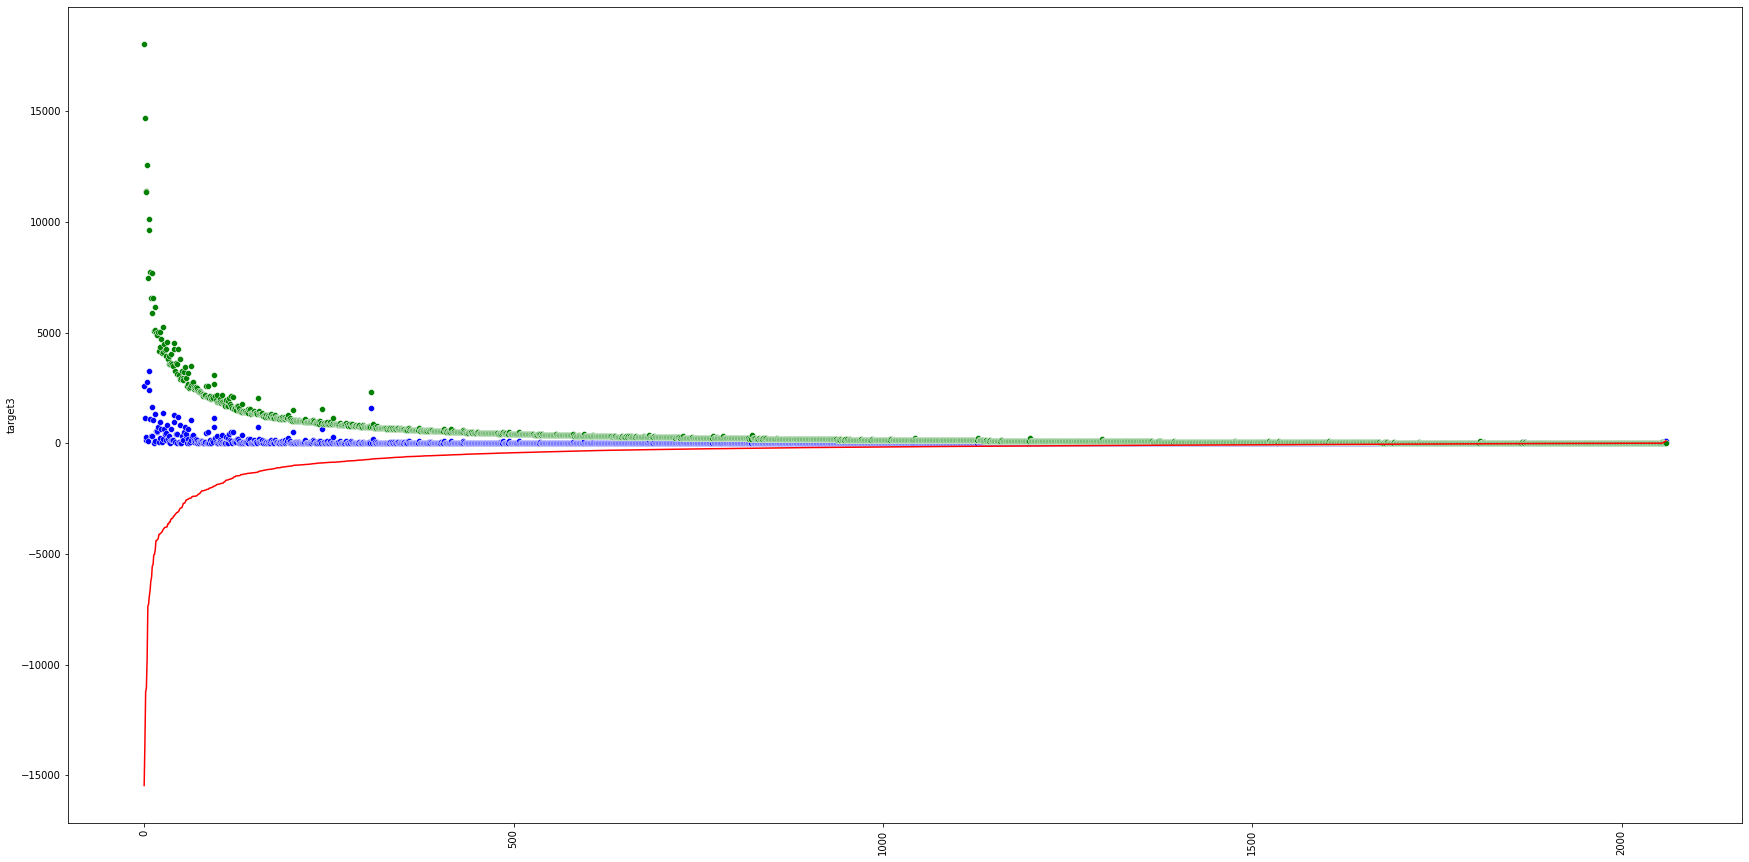

In [86]:
#confirm the trend asumption among targets, and stat
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
Detect_A = 'target3'
Detect_B = 'target4'
Detect_stat = 'cum_q75'
reviewplot = pd.DataFrame()
reviewplot['diff'] = review_target_byplayer[Detect_A][Detect_stat] - review_target_byplayer[Detect_B][Detect_stat]
reviewplot[Detect_A] = review_target_byplayer[Detect_A][Detect_stat]
reviewplot[Detect_B] = review_target_byplayer[Detect_B][Detect_stat]
reviewplot = reviewplot.sort_values('diff')
sns.scatterplot(range(len(review_target_byplayer)),reviewplot[Detect_A],color = 'b')
sns.scatterplot(range(len(review_target_byplayer)),reviewplot[Detect_B],color = 'g')
sns.lineplot(range(len(review_target_byplayer)),reviewplot['diff'],color = 'r')
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target1']['median'],marker="_")
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target2']['median'],marker="_")
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target3']['median'])#,marker="-")
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target4']['median'])#,marker="_")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

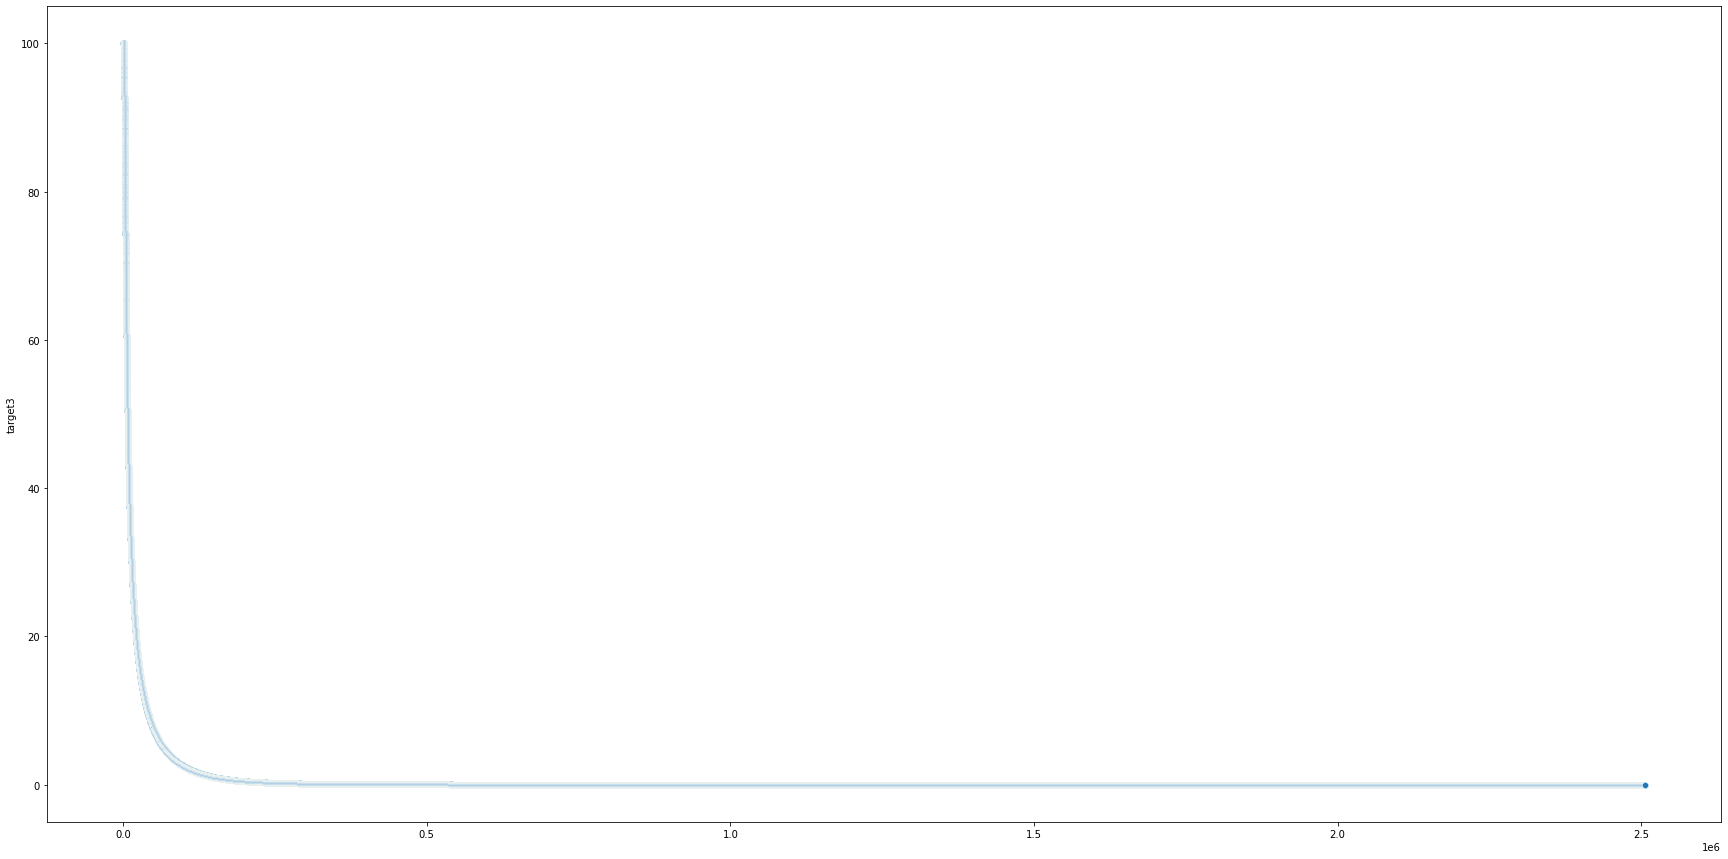

In [92]:
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
Detect_var = 'target3'
kk = train_nextDayPlayerEngagement.sort_values(Detect_var, ascending= False)
sns.scatterplot(range(len(kk)),kk[Detect_var])
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target1']['median'],marker="_")
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target2']['median'],marker="_")
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target3']['median'])#,marker="-")
#sns.scatterplot(range(len(review_target_byplayer)),review_target_byplayer['target4']['median'])#,marker="_")
ax.set(ylim = (0,100))
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


<BarContainer object of 41 artists>

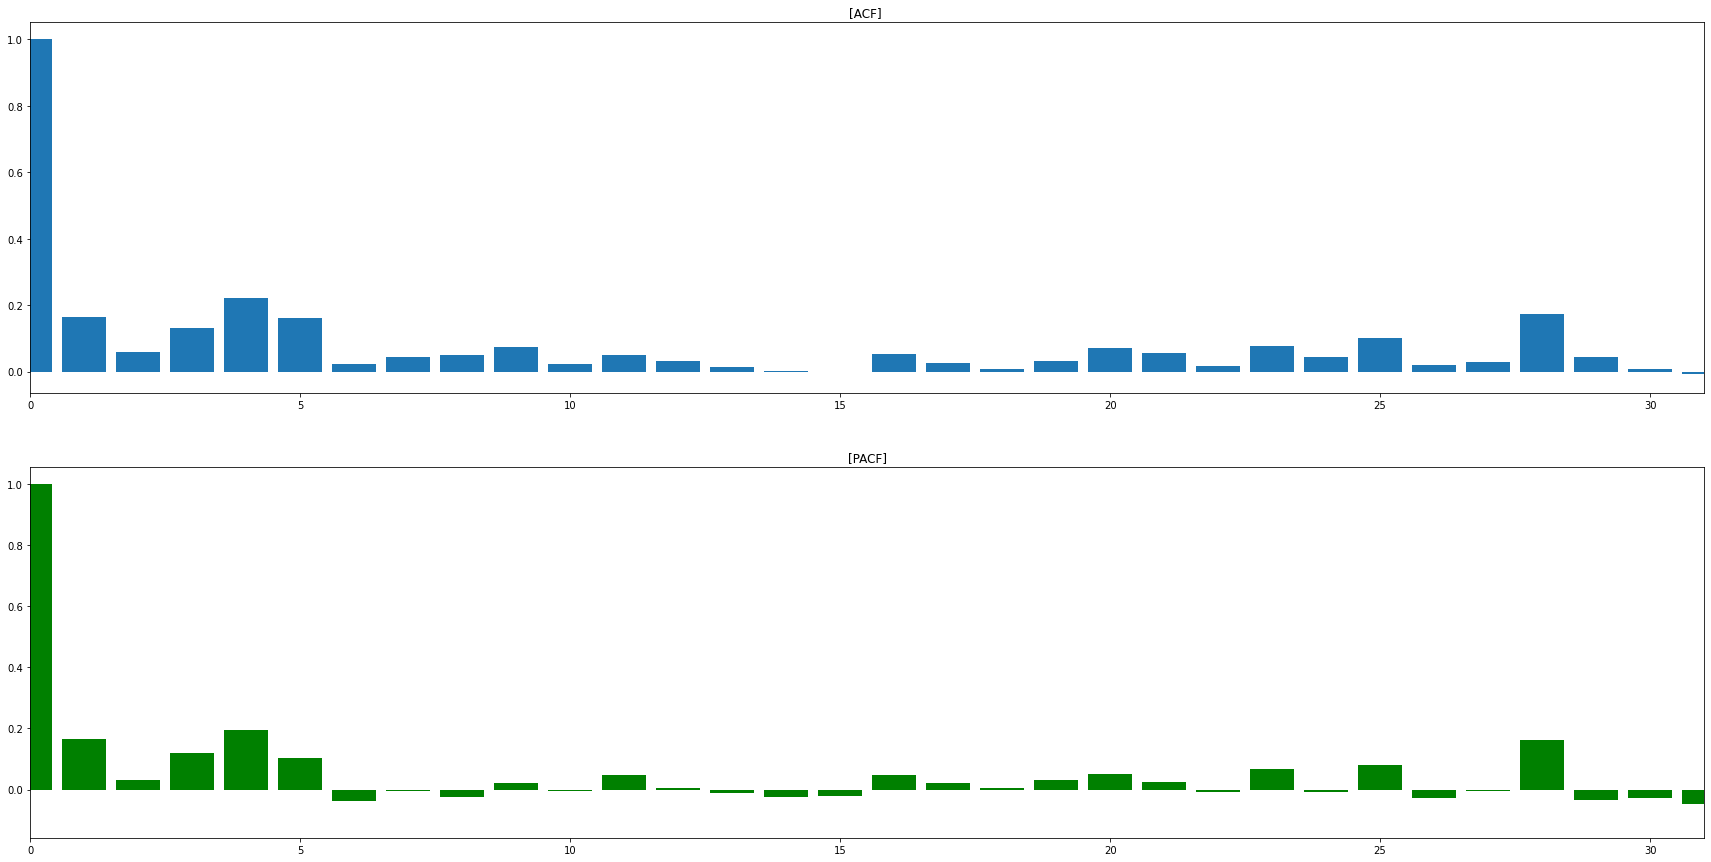

In [145]:
sample_player = train_nextDayPlayerEngagement.sample()
#target_player= sample_player.loc('playerId',0)
selected_logic = (train_nextDayPlayerEngagement['playerId'] == int(sample_player['playerId'])) & (train_nextDayPlayerEngagement['in_season'] == True) & (train_nextDayPlayerEngagement['Date_pre_DT'].dt.year == 2019)
df = train_nextDayPlayerEngagement[selected_logic]['target2']

ACF_Trend = acf(df)
PACF_Trend = pacf(df,40)[:]

a4_dims = (30, 15)
fig, ax = plt.subplots(2,figsize=a4_dims)
ax[0].set_title('[ACF] ')
ax[0].bar(range(ACF_Trend.size),ACF_Trend)
ax[0].set(xlim = (0,31))
#ax[0].bar(range(PACF_Trend.size),PACF_Trend,color = 'green')
ax[1].set_title('[PACF]')
ax[1].set(xlim = (0,31))
ax[1].bar(range(PACF_Trend.size),PACF_Trend,color = 'green')

In [202]:
#aim in AR(1), MR(1)

playerId_list = set(train_nextDayPlayerEngagement['playerId'])
ACF_table = pd.DataFrame(index=playerId_list)#,columns=[['ACF','PACF']])
#n = 0
for player_th in playerId_list:
    selected_logic = (train_nextDayPlayerEngagement['playerId'] == int(player_th)) & (train_nextDayPlayerEngagement['in_season'] == True) & (train_nextDayPlayerEngagement['Date_pre_DT'].dt.year == 2019)
    for i in range(4):
        df = train_nextDayPlayerEngagement[selected_logic]['target'+str(i+1)]
        if sum(df) ==0:
            continue
        ACF_table.loc[int(player_th),'ACF_target'+str(i+1)] = acf(df,nlags=2,fft=True)[1]
        ACF_table.loc[int(player_th),'PACF_target'+str(i+1)] = pacf(df,nlags=2)[1]
        
        df = train_nextDayPlayerEngagement[selected_logic]['target'+str(i+1)+'_10log100']
        if sum(df) ==0:
            continue
        ACF_table.loc[int(player_th),'ACF_target'+str(i+1)+'_10log100'] = acf(df,nlags=2,fft=True)[1]
        ACF_table.loc[int(player_th),'PACF_target'+str(i+1)+'_10log100'] = pacf(df,nlags=2)[1]

In [198]:
ACF_table = ACF_table.dropna()
ACF_table = ACF_table.astype(int)
ACF_table.describe()

,ACF,PACF
count,1383.0,1383.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [204]:
ACF_table.describe()

,ACF_target1,PACF_target1,ACF_target1_10log100,PACF_target1_10log100,ACF_target2,PACF_target2,ACF_target2_10log100,PACF_target2_10log100,ACF_target3,PACF_target3,ACF_target3_10log100,PACF_target3_10log100,ACF_target4,PACF_target4,ACF_target4_10log100,PACF_target4_10log100
count,1860.000000,1860.000000,1860.000000,1860.000000,2060.000000,2060.000000,2060.000000,2060.000000,1818.000000,1818.000000,1818.000000,1818.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,0.332262,0.333759,0.601919,0.604630,0.427181,0.429106,0.671201,0.674224,0.324447,0.325908,0.639398,0.642278,0.415741,0.417613,0.645036,0.647942
std,0.192010,0.192875,0.245945,0.247053,0.215937,0.216910,0.171475,0.172248,0.167570,0.168325,0.200965,0.201871,0.156067,0.156770,0.127013,0.127585
min,-0.098040,-0.098481,-0.098677,-0.099121,-0.079715,-0.080074,-0.082486,-0.082858,-0.081528,-0.081895,-0.082237,-0.082607,-0.031552,-0.031694,-0.032176,-0.032321
25%,0.192174,0.193040,0.566082,0.568632,0.256525,0.257680,0.590307,0.592966,0.197724,0.198614,0.609372,0.612117,0.309067,0.310459,0.602824,0.605539
50%,0.345807,0.347365,0.681580,0.684650,0.459539,0.461609,0.712210,0.715418,0.317216,0.318645,0.701445,0.704604,0.428899,0.430831,0.662611,0.665596
75%,0.473399,0.475531,0.758178,0.761593,0.595647,0.598330,0.791938,0.795505,0.445480,0.447486,0.760375,0.763801,0.531465,0.533859,0.711899,0.715105
max,0.858752,0.862620,0.922158,0.926312,0.877733,0.881687,0.950450,0.954731,0.806116,0.809747,0.943224,0.947473,0.867108,0.871014,0.956804,0.961114


In [ ]:

a4_dims = (30, 15)
fig, ax = plt.subplots(2,figsize=a4_dims)
ax[0].set_title('[ACF] ')
ax[0].bar(range(ACF_Trend.size),ACF_Trend)
ax[0].set(xlim = (0,31))
#ax[0].bar(range(PACF_Trend.size),PACF_Trend,color = 'green')
ax[1].set_title('[PACF]')
ax[1].set(xlim = (0,31))
ax[1].bar(range(PACF_Trend.size),PACF_Trend,color = 'green')